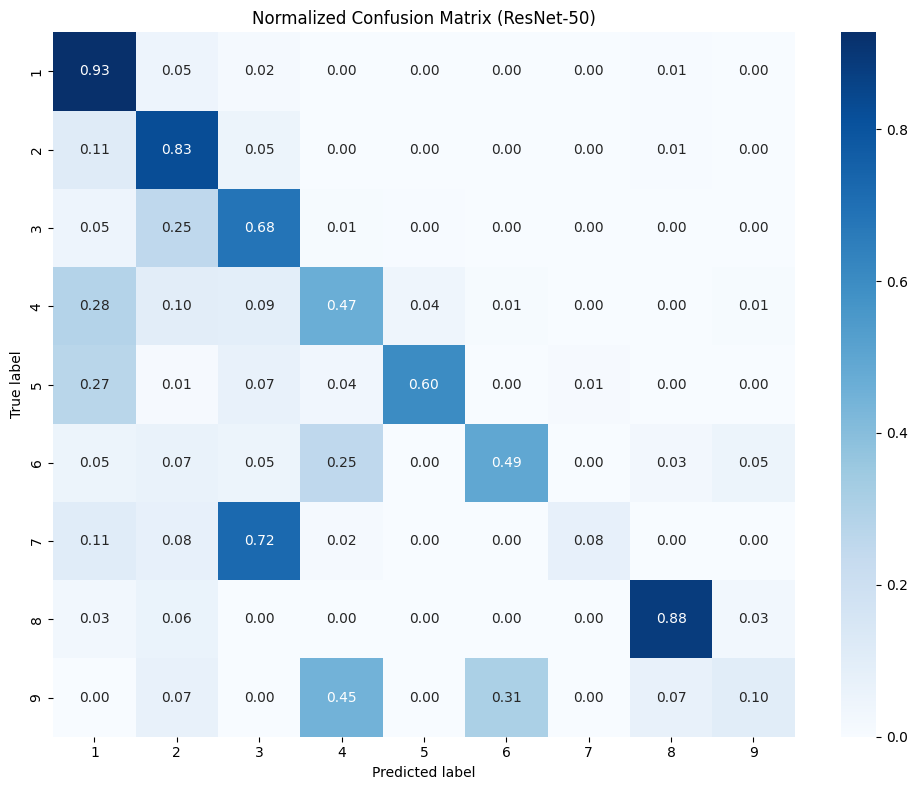

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Your confusion matrix
cm = np.array([
    [2153, 110,  40,   0,  1,  0,  1,  16,  0],
    [  73, 531,  33,   0,  1,  1,  0,   4,  0],
    [  24, 120, 324,   4,  2,  1,  0,   0,  0],
    [  34,  12,  11,  56,  5,  1,  0,   0,  1],
    [  23,   1,   6,   3, 51,  0,  1,   0,  0],
    [   4,   5,   4,  19,  0, 37,  0,   2,  4],
    [   7,   5,  47,   1,  0,  0,  5,   0,  0],
    [   1,   2,   0,   0,  0,  0,  0,  30,  1],
    [   0,   2,   0,  13,  0,  9,  0,   2,  3]
])

# Normalize by row (true class counts)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Class labels (assuming 1–9)
class_names = [str(i) for i in range(1, 10)]

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm_normalized,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
    cbar=True
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Normalized Confusion Matrix (ResNet-50)")
plt.tight_layout()
plt.show()



=== Final Test Metrics ===
Accuracy: 0.8295
Macro F1: 0.6285

Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.86      0.92      2322
           2       0.93      0.87      0.90       644
           3       0.73      0.78      0.76       475
           4       0.54      0.69      0.60       120
           5       0.25      0.78      0.38        86
           6       0.40      0.59      0.48        74
           7       0.27      0.42      0.33        65
           8       0.81      0.88      0.84        33
           9       0.35      0.62      0.45        29

    accuracy                           0.83      3848
   macro avg       0.59      0.72      0.63      3848
weighted avg       0.88      0.83      0.85      3848



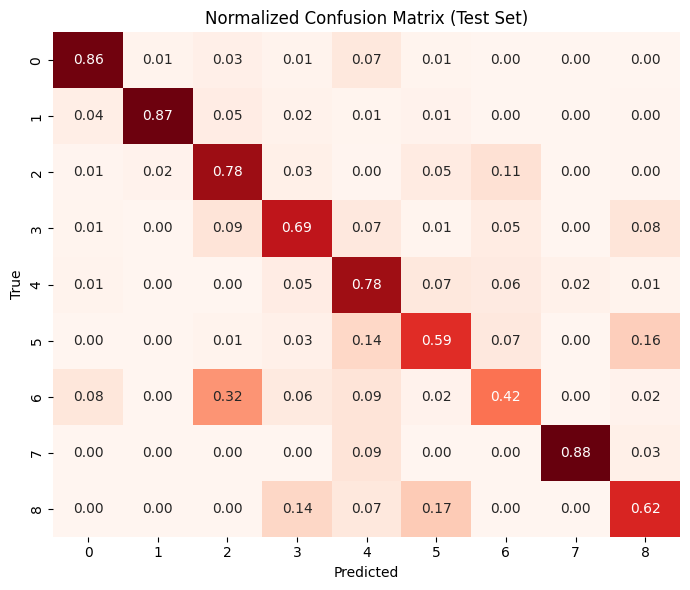

In [1]:
import joblib
import numpy as np
import re
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# === Utility to extract class labels ===
def extract_labels(paths):
    # Extract the last digit before .jpg, e.g. "image_3.jpg" -> 3
    return np.array([int(re.search(r'(\d)(?=\.jpg$)', p).group(1)) for p in paths])

# === Load embeddings ===
train_data = np.load("../normalised_embeddings/dino_normalised_embeddings_train.npz")
test_data = np.load("../normalised_embeddings/dino_normalised_embeddings_test.npz")
X_train = train_data["embeddings"]
y_train = extract_labels(train_data["image_paths"])
X_test_all = test_data["embeddings"]
y_test_all = extract_labels(test_data["image_paths"])

# Split test file into validation and final test (50/50)
X_val, X_test, y_val, y_test = train_test_split(
    X_test_all, y_test_all, test_size=0.5, random_state=42, stratify=y_test_all
)

# === Load saved model ===
model_path = "SVC_sigmoid_dinov2.joblib"  # Update this path if needed
best_model = joblib.load(model_path)

# === Evaluate on held-out test set ===
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average="macro")
cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalized per row

print("\n=== Final Test Metrics ===")
print(f"Accuracy: {acc:.4f}")
print(f"Macro F1: {f1_macro:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# === Normalized Confusion Matrix ===
plt.figure(figsize=(7, 6))
sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap='Reds', cbar=False)
plt.title("Normalized Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()
